## Exercise 1 Solution

*Using `astroquery`, plot the distribution of exoplanets discovered by the [microlensing](https://science.nasa.gov/mission/roman-space-telescope/microlensing/) method across the celestial sphere as a heat map. That is, iterate over a grid of RA/DEC, count the number of micolensing planets in a cone with a radius equal to the size of the grid spacing (e.g., if the grid spacing is 1 degree, search a cone of 1 degrees.) What do you notice? What might explain this distribution? Use matplotlib's `imshow` method to create your plot.*

**NOTE: This exercise has many potentially correct solutions! Use the output of this exercise to check your work.


Based on the question, we know we will be making a **2D map**, which will involve two `for` loops and making a 'list-of-lists'. The question can be boiled down to compiling a count of targets within a circle of radius the size of the grid spacing, centered on the given FOV.

360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0


/tmp/ipykernel_30201/3049735397.py:49: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if indices in ra_index:


360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0


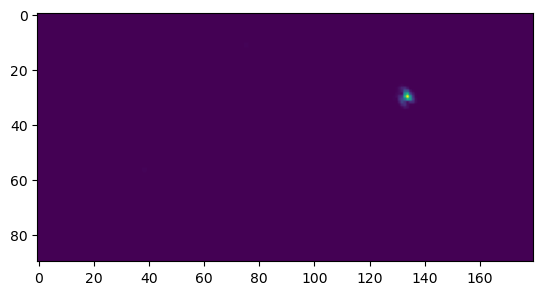

In [82]:
from matplotlib.pyplot import imshow
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive as NEA
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

## Creat our RA/DEC grid
RAs = np.linspace(0,360, num=180)
DECs = np.linspace(-90,90, num=90)
RA_grid = []
##Query the relevant data
query = NEA.query_criteria(table="pscomppars", select="ra,dec",
                                    where="discoverymethod like 'Microlensing'")  

##Create an index column to keep track of individual systems
query['index'] = range(0, len(query))

##Start the loop over each RA/DEC pair in the grid
for DEC in DECs:
    ##reset the DEC grid at each new RA
    DEC_grid = []
    for RA in RAs:
        ##Keep track of counts
        count = 0
        
        ##These lines returns the absolute difference 
        ##of the grid center point and the target
        ##If it's less than the defined square, keep 
        ra_list = query[np.abs(RA-query['ra'].value) < 2]
        dec_list = query[np.abs(DEC-query['dec'].value) < 2]
        
        ##Associate the ra/dec lists above with the index values
        ##assigned to track each target
        dec_index = list(dec_list['index'])
        ra_index = list(ra_list['index'])
        
        ##Account for the RA boundary condition
        if RA < 2:
            a = query[np.abs(RA-np.abs(360-query['ra'].value)) < 2]
            a_index = a['index']
            ra_index.append(a_index)
        elif RA > 358:
            a = query[np.abs(RA-np.abs(360-query['ra'].value)) < 2]
            a_index = a['index']
            ra_index.append(a_index)
        ##See if the index markers match for the DEC/RA pairs. If they do, the target falls within the square, so count
        ##If not, do not count
        for indices in dec_index:
            if indices in ra_index:
                count += 1
        ##For each DEC, append the counts
        DEC_grid.append(count)
    ##Append the DEC list to the RA grid.
    RA_grid.append(DEC_grid)
##Plot. Think about how the data is sifted through; do you need to flip or mirror any axes?
imshow(RA_grid)